# Lassso Regresyon

## Model

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, LassoCV
import matplotlib.pyplot as plt

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()

dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])

y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25,
                                                   random_state=42)

In [12]:
# Model
lasso_model = Lasso(alpha=0.5, max_iter=10000)

In [13]:
# Modeli eğitme
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.5, max_iter=10000)

In [15]:
# Katsayılara erişme 
lasso_model.coef_

array([-1.70017651e+00,  6.83109967e+00,  5.02628295e+00, -1.84332799e+00,
       -1.29681669e+00,  5.04548951e+00,  8.82494552e-01, -2.17458320e-01,
        7.30992711e-02, -8.31785548e-01,  1.59206105e+00,  1.15255444e+00,
       -7.24191768e-01,  2.75315528e-01,  3.96130879e-01, -2.81588995e+00,
        5.62751130e+01, -1.17779861e+02, -0.00000000e+00])

/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+04, tolerance: 5.017e+03
  model = cd_fast.enet_coordinate_descent(
/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.039e+04, tolerance: 5.017e+03
  model = cd_fast.enet_coordinate_descent(
/Users/batuhanbilgili/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consi

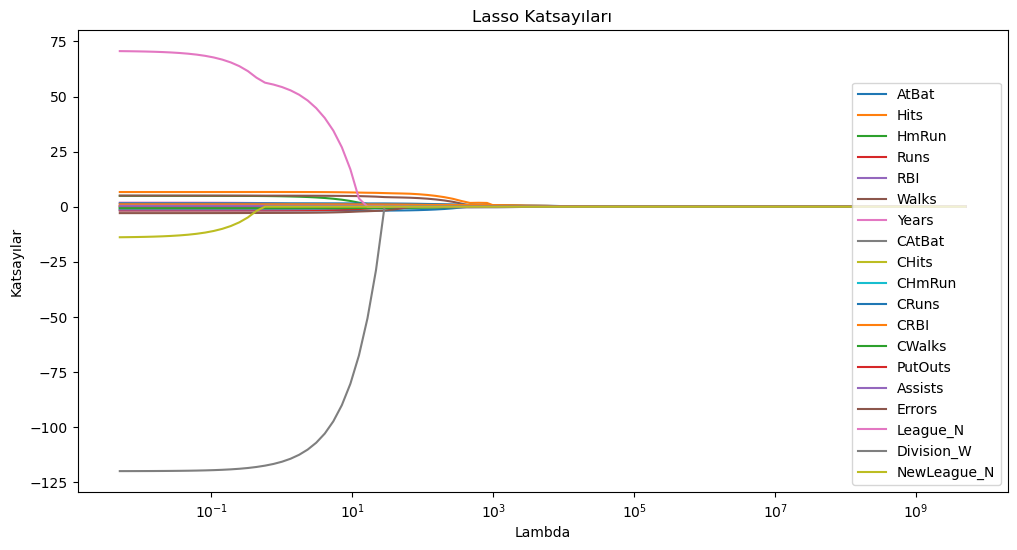

In [18]:
lasso = Lasso()

# Farklı lambda değerlerinde model eğitimi ve katsayıları kaydetme
lambdas = 10**np.linspace(10,-2,100)*0.5

# Katsayıları tutacak dizi
coef_array = []

for i in lambdas:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    coef_array.append(lasso.coef_)

# Katsayıları görselleştirme
plt.figure(figsize=(12, 6))
plt.plot(lambdas, coef_array)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Katsayılar')
plt.title('Lasso Katsayıları')
plt.legend(X.columns, loc="lower right")
plt.show()

## Tahmin

In [20]:
lasso_model.predict(X_test)

array([ 597.52271834,  626.96511177,  905.05009957,  420.63560909,
        439.74876227,  393.66348003,  597.059696  ,  434.49764893,
        898.73667765,  782.27453586,  617.7696676 ,  918.4074515 ,
        224.95457375,  413.43360928,  277.6745751 ,  449.85929924,
        749.96224342,   86.20099487, 1195.99714366,  312.97060418,
        436.85512698,  650.24537764,  547.69027691,  613.37810714,
        587.64265074])

In [21]:
y_pred = lasso_model.predict(X_test)

In [22]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

263.4370756840094


## Model Tuning

In [48]:
lasso_cv_model = LassoCV(alphas= None, 
                         cv = 10, 
                         max_iter=10000)

In [49]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [50]:
lasso_cv_model.alpha_

1.921147001831712

In [51]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_)

In [53]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1.921147001831712)

In [54]:
y_pred = lasso_tuned.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, y_pred))

265.56448168227837